In [1]:

from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd
import datetime as dt
from pathlib import Path

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [8]:
# create engine to hawaii.sqlite
database_path = Path("C:/Users/Shari/Desktop/Data Science Course/Challenges/sqlalchemy-challenge/Resources/hawaii.sqlite")
engine = create_engine(f"sqlite:///{database_path}")

In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [10]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(measurement.date)).scalar()
recent_date


'2017-08-23'

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
date_filter = dt.date(2017, 8, 23) - dt.timedelta(days=365)
date_filter

datetime.date(2016, 8, 23)

In [ ]:
# Perform a query to retrieve the data and precipitation scores
pcpt_scores = session.query(measurement.date,measurement.prcp).filter(measurement.date >= date_filter).all()
pcpt_scores

In [25]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_pcpt = pd.DataFrame(pcpt_scores, columns=['date', 'precipitation'])

# Sort the dataframe by date
df_pcpt_sorted = df_pcpt.sort_values("date").reset_index(drop=True)
df_pcpt_sorted

,date,precipitation
0,2016-08-23,0.00
1,2016-08-23,NaN
2,2016-08-23,1.79
3,2016-08-23,0.05
4,2016-08-23,0.15
...,...,...
2225,2017-08-22,0.00
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


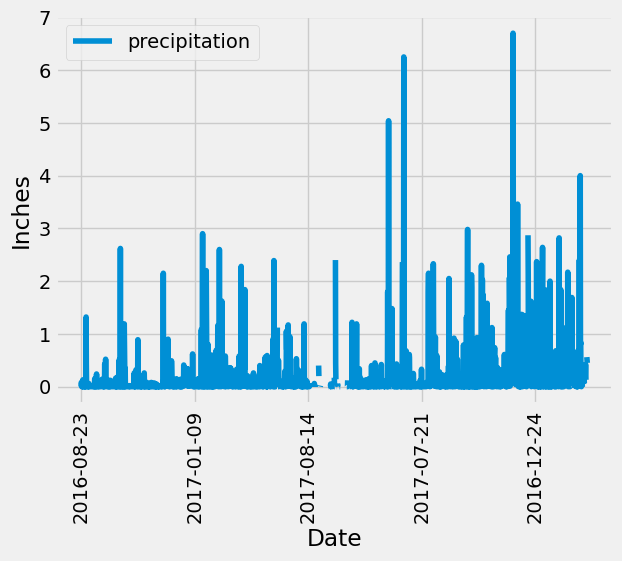

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
df_pcpt.plot(x='date', y='precipitation', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [18]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = df_pcpt.describe()
summary_stats

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number of stations in the dataset
num_stations = session.query(func.count(station.station)).all()
num_stations

[(9,)]

In [20]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = (
    session.query(station.station, func.count(measurement.station))
    .join(measurement, station.station == measurement.station)
    .group_by(station.station)
    .order_by(desc(func.count(measurement.station)))
    .all()
)

station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

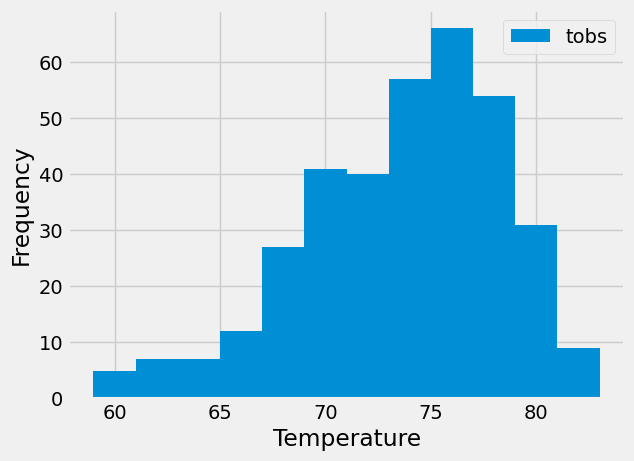

In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Find most recent date for most active station
station_recent_date = session.query(func.max(measurement.date)).filter(measurement.station == 'USC00519281').scalar()
station_recent_date
#Create a filter date for last 12 months
filter_date = dt.datetime(2017,8,18) - dt.timedelta(days=365)
# Query for last 12 months of temperature data for the most active station
station_data = (session.query(measurement.tobs)
                .filter(measurement.station == 'USC00519281',measurement.date >= filter_date).all())
# Convert station data to dataframe
station_df = pd.DataFrame(station_data,columns=['tobs'])

# Plot histogram with 12 bins
ax = station_df.plot.hist(bins=12)
ax.set_xlabel('Temperature')
plt.show()

# Close Session

In [24]:
# Close Session
session.close()